# Distillation column example

Process engineers from the site stabilized the yield of a distillation tower but the baseline is now lower than before. There are more than 20 tags (sensors), and it is difficult to understand what process parameters had an impact

Data has been extracted in a CSV for you.

`https://raw.githubusercontent.com/industrial-data/predictor-explainer/main/data/dist_tower_na.csv`  

You can use the URL as a path directly in Pandas.

You can upload it as a file in Google Colab and then use the following path:
`'/content/dist_tower_na.csv'`

The following script includes some EDA (exploratory data analysis) and screening using machine learning.

![364px-Colonne_distillazione.jpg](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Colonne_distillazione.jpg/364px-Colonne_distillazione.jpg)

# Minimal AutoML solution (PyCaret)

[Industrial data science – a review of machine learning applications for chemical and process industries]()

Max Mowbray,  Mattia Vallerio,  Carlos Perez-Galvan,  Dongda Zhang,
Antonio Del Rio Chanona and Francisco J. Navarro-Brull

CC-BY (code under BSD-3)

<div class="alert alert-block alert-warning">
<b>Pycaret</b> only works with specific versions of scipy, scikitlearn, etc. Please install pycaret in its own environment first.  
</div>

%pip install pycaret

For shap:
%pip install pycaret[analysis]

First, we need to load the libraries and the dataset

In [1]:
import pycaret

In [3]:
import pandas as pd

In [4]:
path_url = 'https://raw.githubusercontent.com/industrial-data/predictor-explainer/main/data/dist_tower_na.csv'

#path_gclab = '/content/dist_tower_na.csv' # needs to be manually upladed first

df = pd.read_csv(path_url)

# Parsing dates can be tricky, here we load the date as an indexed column.

In [5]:
df.head()

,Date,yield,OC1,Temp11,Temp12,PressureC1,TempC1,Temp1,FlowC1,Temp2,...,Temp6,Temp7,Temp8,FlowC9,FlowC2,Temp9,Temp10,FlowC3,FlowC4,VapourPressure
0,2016-08-21T00:00:00,69.400623,3.1033,30.8983,489.9900,215.0627,100.2204,139.9857,432.0636,377.8119,...,488.6745,1129.6040,522.4728,86.6133,69.9017,461.2371,513.9653,8.6279,10.5988,32.5026
1,2016-08-23T00:00:00,66.532666,4.7408,31.9099,480.2888,205.0999,100.2297,131.0470,487.4029,371.3060,...,479.5883,1082.9395,516.0140,97.6100,69.6900,450.3000,504.5145,8.7662,10.7560,NaN
2,2016-08-26T00:00:00,71.102193,4.2925,29.9165,486.6190,205.0304,100.3084,118.2666,437.3516,NaN,...,485.6129,1076.9067,514.6193,88.4967,70.5867,458.8101,508.9997,8.5319,10.5737,32.1666
3,2016-08-29T00:00:00,69.793481,4.4558,30.6229,491.1304,205.2561,95.5766,118.1769,481.8314,378.0028,...,489.8262,1078.9117,519.3823,95.3483,70.2167,462.5252,514.1794,8.6260,10.6695,30.4064
4,2016-08-30T00:00:00,71.489516,3.4600,29.4977,487.6475,205.0883,92.9052,120.7891,NaN,377.8871,...,485.5724,1087.4271,508.6756,82.9533,69.6567,NaN,511.0948,8.5939,NaN,30.9238


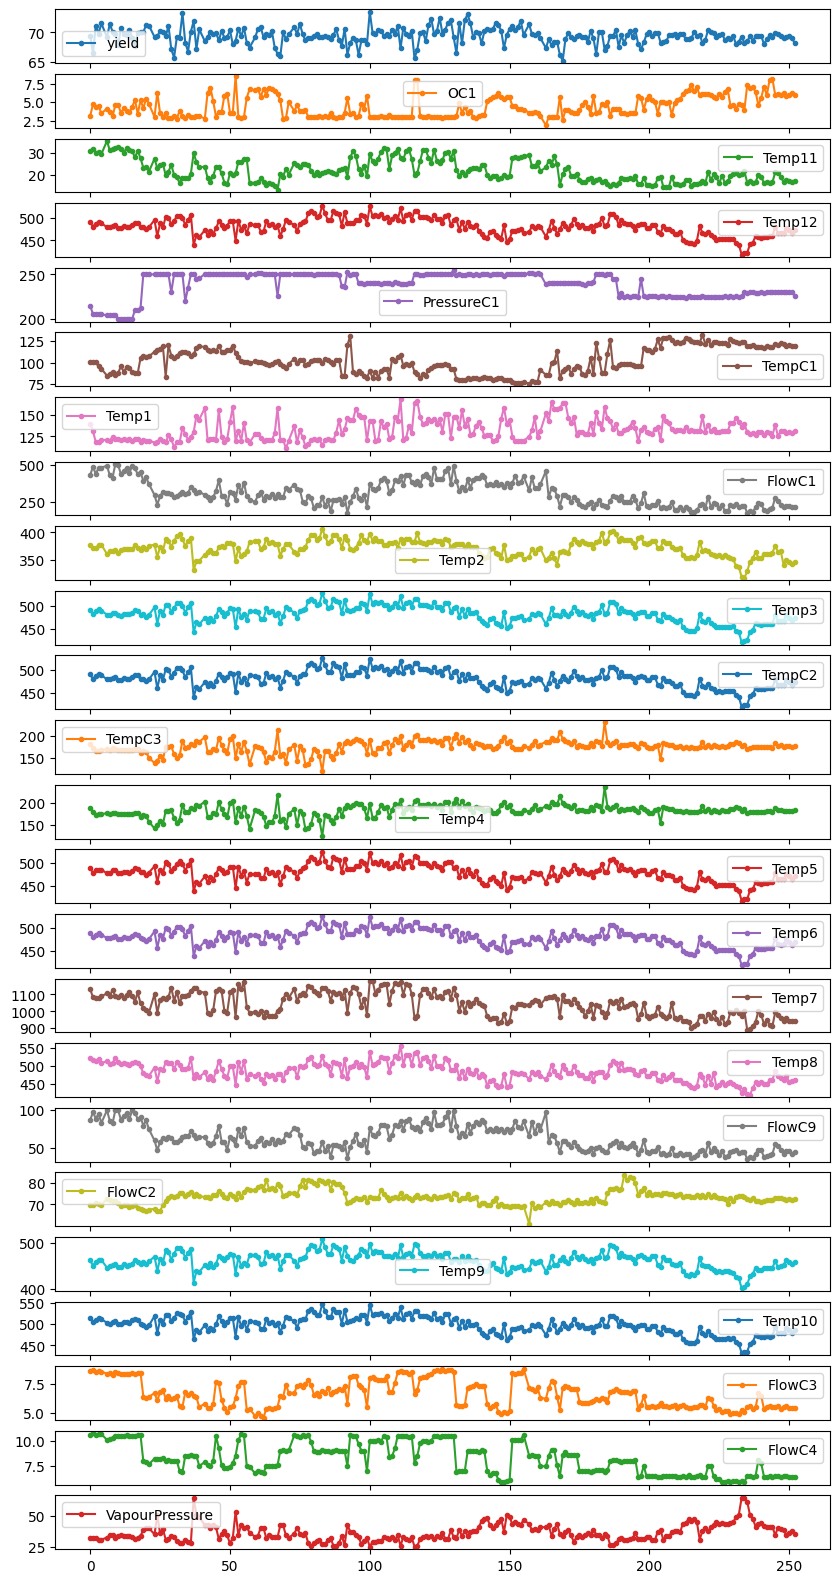

In [6]:
# Data processing

# Removing missing values in target
df = df.dropna(subset=['yield'])

# Forwward filling empty values
df = df.fillna(method="ffill")
del df['Date']

# minimal EDA
df.plot(figsize=(10,20), style='.-', subplots=True);

# PyCaret

In [7]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data = df, target = 'yield',
          fold_shuffle=True)

,Description,Value
0,Session id,2318
1,Target,yield
2,Target type,Regression
3,Original data shape,"(246, 24)"
4,Transformed data shape,"(246, 24)"
5,Transformed train set shape,"(172, 24)"
6,Transformed test set shape,"(74, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [8]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.7685,1.1018,1.0294,0.2366,0.0146,0.0111,0.3170
xgboost,Extreme Gradient Boosting,0.7918,1.1799,1.0495,0.2164,0.0149,0.0114,0.1050
rf,Random Forest Regressor,0.7717,1.1540,1.0383,0.2157,0.0148,0.0111,0.3660
ada,AdaBoost Regressor,0.8264,1.2757,1.0875,0.1755,0.0155,0.0119,0.2060
lightgbm,Light Gradient Boosting Machine,0.8048,1.2121,1.0780,0.1468,0.0153,0.0116,0.0690
gbr,Gradient Boosting Regressor,0.8371,1.2535,1.0924,0.1419,0.0155,0.0121,0.1330
br,Bayesian Ridge,0.8561,1.4461,1.1805,0.0318,0.0168,0.0124,0.0230
omp,Orthogonal Matching Pursuit,0.8434,1.4264,1.1759,0.0159,0.0167,0.0122,0.0210
en,Elastic Net,0.8625,1.4890,1.1957,0.0101,0.0170,0.0125,0.0210
llar,Lasso Least Angle Regression,0.8625,1.5019,1.2008,-0.0032,0.0171,0.0125,0.0220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

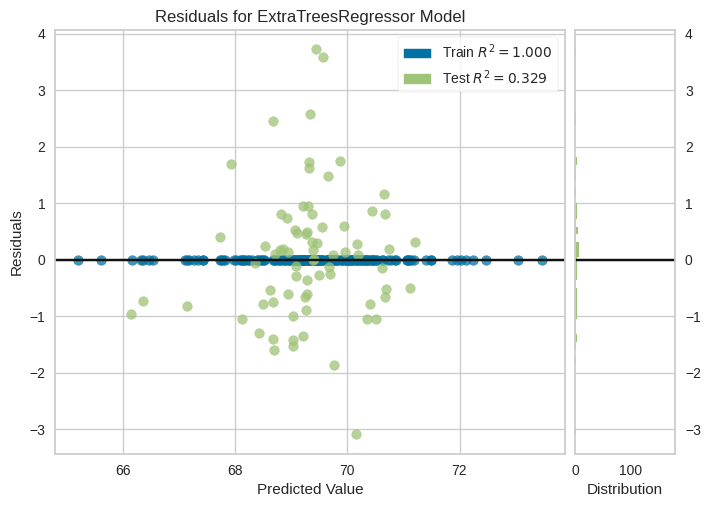

In [9]:
# plot residuals
plot_model(best, plot = 'residuals')

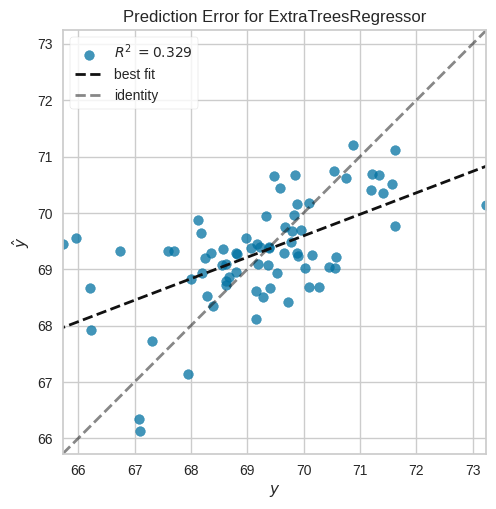

In [10]:
# plot error
plot_model(best, plot = 'error')

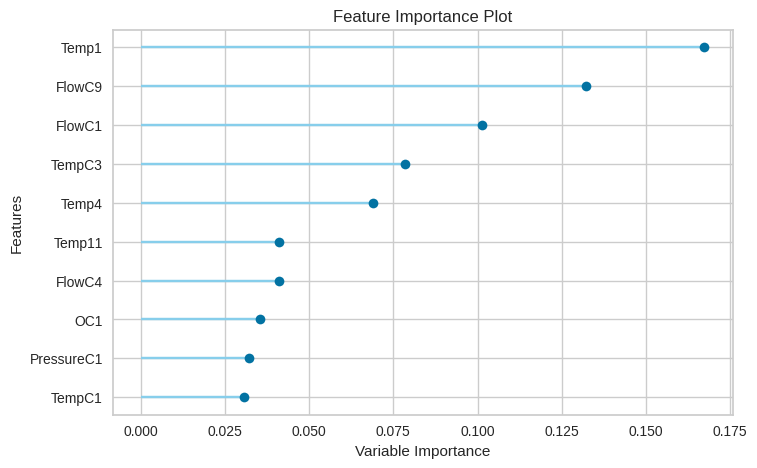

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')